# Some important admin and homework for next time.


__Important point__. If you have not filled __[the mid-term survery ](https://docs.google.com/forms/d/e/1FAIpQLSdD_3Qx-JMn_fFhEkRDqEorkoHP4Dkge9YGKYiePdbn0rYJ1A/viewform?usp=sf_link)__, please do! This is super important for me to make sure that the second half of the semester goes well. I promise it should not take more than 5 minutes. 


# Overview of today's class.

This week's curriculum is about text analysis. The overview is

* Tricks for raw text (NLPP Chapter 3) and finding the important words in a document (TF-IDF)
* Apply these tricks to study the content of submissions 

In the first part, we will take a quick tour of NLPP's chapter 3, which is boring, but an amazing resource that you'll keep returning to. Then we'll talk about how we can use simple statistics to get text to show us what it's all about. We will even do a little visualization. 


# Part 1 - Processing real text (from out on the inter-webs)

Ok. So Chapter 3 in NLPP is all about working with text from the real world. Getting text from this internet, cleaning it, tokenizing, modifying (e.g. stemming, converting to lower case, etc) to get the text in shape to work with the NLTK tools you've already learned about - and many more. In the process we'll learn more about regular expressions, as well as unicode; something we've already been struggling with a little bit will now be explained in more detail. 
> 
> **Video lecture**: Short overview of chapter 3 + a few words about kinds of language processing that we don't address in this class. 
> 

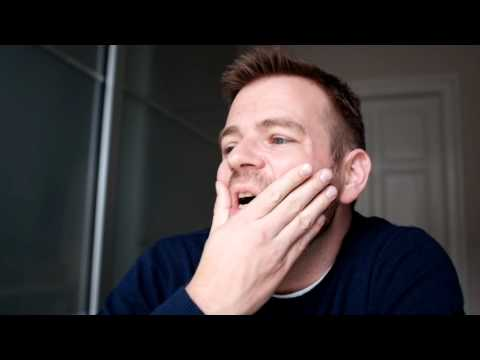

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Rwakh-HXPJk",width=800, height=450)

> *Reading*: NLPP Chapter 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, and 3.10\. It's not important that you go in depth with everything here - the key thing is that you *know that Chapter 3 of this book exists*, and that it's a great place to return to if you're ever in need of an explanation of regular expressions, unicode, or other topics that you forget as soon as you stop using them (and don't worry, I forget about those things too).

> _Exercise_ 1: Just a couple of examples from the book: Work through the exercises NLPP 3.12: 6, 30.

### 6
Describe the class of strings matched by the following regular expressions.

-    `[a-zA-Z]+`
 > matches one or more of the characters in the alphabet in sequence
-    `[A-Z][a-z]*`
> match a capital letter followed by zero or more lower case letters
-   `p[aeiou]{,2}t`
> match a `p` then `0..2` letters in the `[..]` followed by a `t`
-   `\d+(\.\d+)?`
> match one or more digits followed by a potential `.` and then 0 or more digits, also the numbers after the `.` will be matched in a group
-    `([^aeiou][aeiou][^aeiou])*`
> will match each character, but only return a non empty match for sequences which don't start with a vowel or end with a vowel, but have one vowel in between the consonants.
>> so basically 3 letter words
-    `\w+|[^\w\s]+`
> match a word or one or more characters which aren't a word followed by a whitespace.

### 30

Use the Porter Stemmer to normalize some tokenized text, calling the stemmer on each word. Do the same thing with the Lancaster Stemmer and see if you observe any differences.

In [5]:
import nltk
from nltk import word_tokenize
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
 is no basis for a system of government.  Supreme executive power derives from
 a mandate from the masses, not from some farcical aquatic ceremony."""
tokens = word_tokenize(raw)
port_stem = [porter.stem(t) for t in tokens]
lan_stem = [lancaster.stem(t) for t in tokens]
for s1,s2 in zip(port_stem,lan_stem):
    if s1 != s2:
        print(f"Porter stem: {s1}, Lancaster stem: {s2}")

Porter stem: denni, Lancaster stem: den
Porter stem: listen, Lancaster stem: list
Porter stem: strang, Lancaster stem: strange
Porter stem: women, Lancaster stem: wom
Porter stem: lie, Lancaster stem: lying
Porter stem: basi, Lancaster stem: bas
Porter stem: power, Lancaster stem: pow
Porter stem: deriv, Lancaster stem: der
Porter stem: mandat, Lancaster stem: mand
Porter stem: some, Lancaster stem: som
Porter stem: farcic, Lancaster stem: farc
Porter stem: aquat, Lancaster stem: aqu
Porter stem: ceremoni, Lancaster stem: ceremony


['DENNIS',
 ':',
 'Listen',
 ',',
 'strange',
 'women',
 'lying',
 'in',
 'ponds',
 'distributing',
 'swords',
 'is',
 'no',
 'basis',
 'for',
 'a',
 'system',
 'of',
 'government',
 '.',
 'Supreme',
 'executive',
 'power',
 'derives',
 'from',
 'a',
 'mandate',
 'from',
 'the',
 'masses',
 ',',
 'not',
 'from',
 'some',
 'farcical',
 'aquatic',
 'ceremony',
 '.']

### Prelude to part 2. -  Data.

In the follwing exercises, we will study the text contained in _r/wallstreebets_ submissions. To make things a bit more exciting, we will work with \**all** the submissions posted in 2020 in _r/wallstreebets_. As you may well guess, we will need both the title and the content of each submission.

To make things a bit less tedious for you guys, I downloaded and made avaialble the data you need (you can find it [here](https://github.com/lalessan/comsocsci2021/blob/master/data/wallstreet_subs.csv.gz)). The dataset consists of all the submissions posted between January 1st and December 31st 2020 with content in English. For each submission, you have the following information: timestamp of creation (__created_utc__), __title__, textual content (__selftext__), and __score__. You are welcome to use this data. If you prefer to download your own (see optional exercise below), that's even better!! As usual, I do not expect you to find a perfect match between your data and mine. In the exercises below, I refer to this data as the "_wallstreetbets submissions dataset_".

_Exercise (Optional)_: 

> * Download all submissions posted on _r/wallstreetbets_ in 2020 using [psaw](https://pypi.org/project/psaw/).
> * For each submission, keep the title, the textual content, the score, the author, and the time of creation. 
> * Remove submissions whose content has been removed, and those that are not in English. You can use the library [langdetect](https://pypi.org/project/langdetect/) to detect the language of a given text.



In [6]:
import pandas as pd

wsb = pd.read_csv('../files/wallstreet_subs.csv')

In [13]:
list(wsb.columns)

['created_utc', 'title', 'selftext', 'score']

# Part 2 - Words that characterize stocks discussed on r/wallstreetbets

In this section, we'll begin to play around with how far we can get with simple strategies for looking at text. The video is Sune talking about a fun paper, which shows you how little is needed in order to reveal something very interesting about humans that produce text. Then, we'll use a very simple weighting scheme called TF-IDF to find the words in the reddit r/wallstreetbets submissions that charachterize different stocks. In cleaning the Reddit submissions, we'll use some of the stuff you've just read about above. Finally, we'll even visualize them in a fun little word cloud (below is what I found for the discussions around Gamestop, Microsoft, and Tesla). The wordclouds may not be immediately understandable. But if you do some research on the important words, you will find that the TF-IDF method extracts quite interesting information.

<img src="https://github.com/lalessan/comsocsci2021/blob/master/files/wordclouds.png?raw=true" alt="Drawing" style="width: 1000px;"/>


> **Video lecture**: Simple methods reveal a lot. Sune talks a little bit about the paper: [Personality, Gender, and Age in the Language of Social Media: The Open-Vocabulary Approach](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073791).  

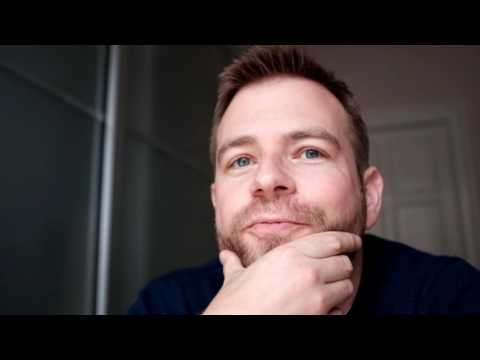

In [14]:
YouTubeVideo("wkYvdfkVmlI",width=800, height=450)

_Exercise 2: Most discussed stocks in r/wallstreebets_. GME is only one among many stocks people have discussed in _r/wallstreetbets_. In this exercise, we will find the most discussed stocks on _wallstreetbets_. Stocks are identified by their [Ticker symbol](https://en.wikipedia.org/wiki/Ticker_symbol). A Ticker symbol is nothing but a string consisting of letters and numbers, and is typically quite short. For example the Gamestop symbol is _GME_, Amazon is _AMZN_, Alphabet is _GOOGL_...

> 1. To talk about a specific stock, Redditors often use the corresponding ticker symbol [preceded by the dollar sign](https://www.reddit.com/r/wallstreetbets/comments/5yvvue/why_do_you_put_a_dollar_sign_in_front_of_a_ticker/) (\\$GME, \$AMZN...). Write down a [Regular Expression](https://en.wikipedia.org/wiki/Regular_expression) matching words that begin with a dollar sign "\\$". See [NLPP book, section 3.4]().

In [22]:
import re

regex = r"\$([a-zA-Z]+)"
c_regex = re.compile(regex)

> 2. Load the _wallstreetbets submission dataset_ as a Pandas DataFrame and create a new column containing both the title and the textual content of each submission (as one long string). We refer to this as the _text_ of the submission.

In [15]:
import pandas as pd

wsb = pd.read_csv('../files/wallstreet_subs.csv')
wsb['text'] = [title + text for title,text in zip(wsb.title, wsb.selftext)]

> 3. For each submission, find all ticker symbols (those preceded by a dollar sign) contained in the _text_. Use the function [re.findall](https://docs.python.org/3/library/re.html), and the regular expression you created in point 1). 

In [40]:
import numpy as np
tickers = [c_regex.findall(text) for text in wsb.text]
tickers = [ticks for ticks in tickers if len(ticks) != 0]
tickers = np.hstack(np.array(tickers,dtype=object).flatten())

def upper(x):
    return x.upper()

tickers = np.vectorize(upper)(tickers)

Some tips for success: 
> > * Remove matches that are definetly not stock symbols (for example amounts like: \\$100, \$1000k).
> > * Convert all matches to uppercase
> > * Remove the dollar sign at the beginning of the symbol (e.g. \\$gme → GME).

> 4. Create a list containing the top 15 Ticker Symbols by number of occurrences. GME should be among them. If it is not, check again your analysis and/or come talk to me. Google the top 15 symbols and find the corresponding company names. Are they known companies or not?

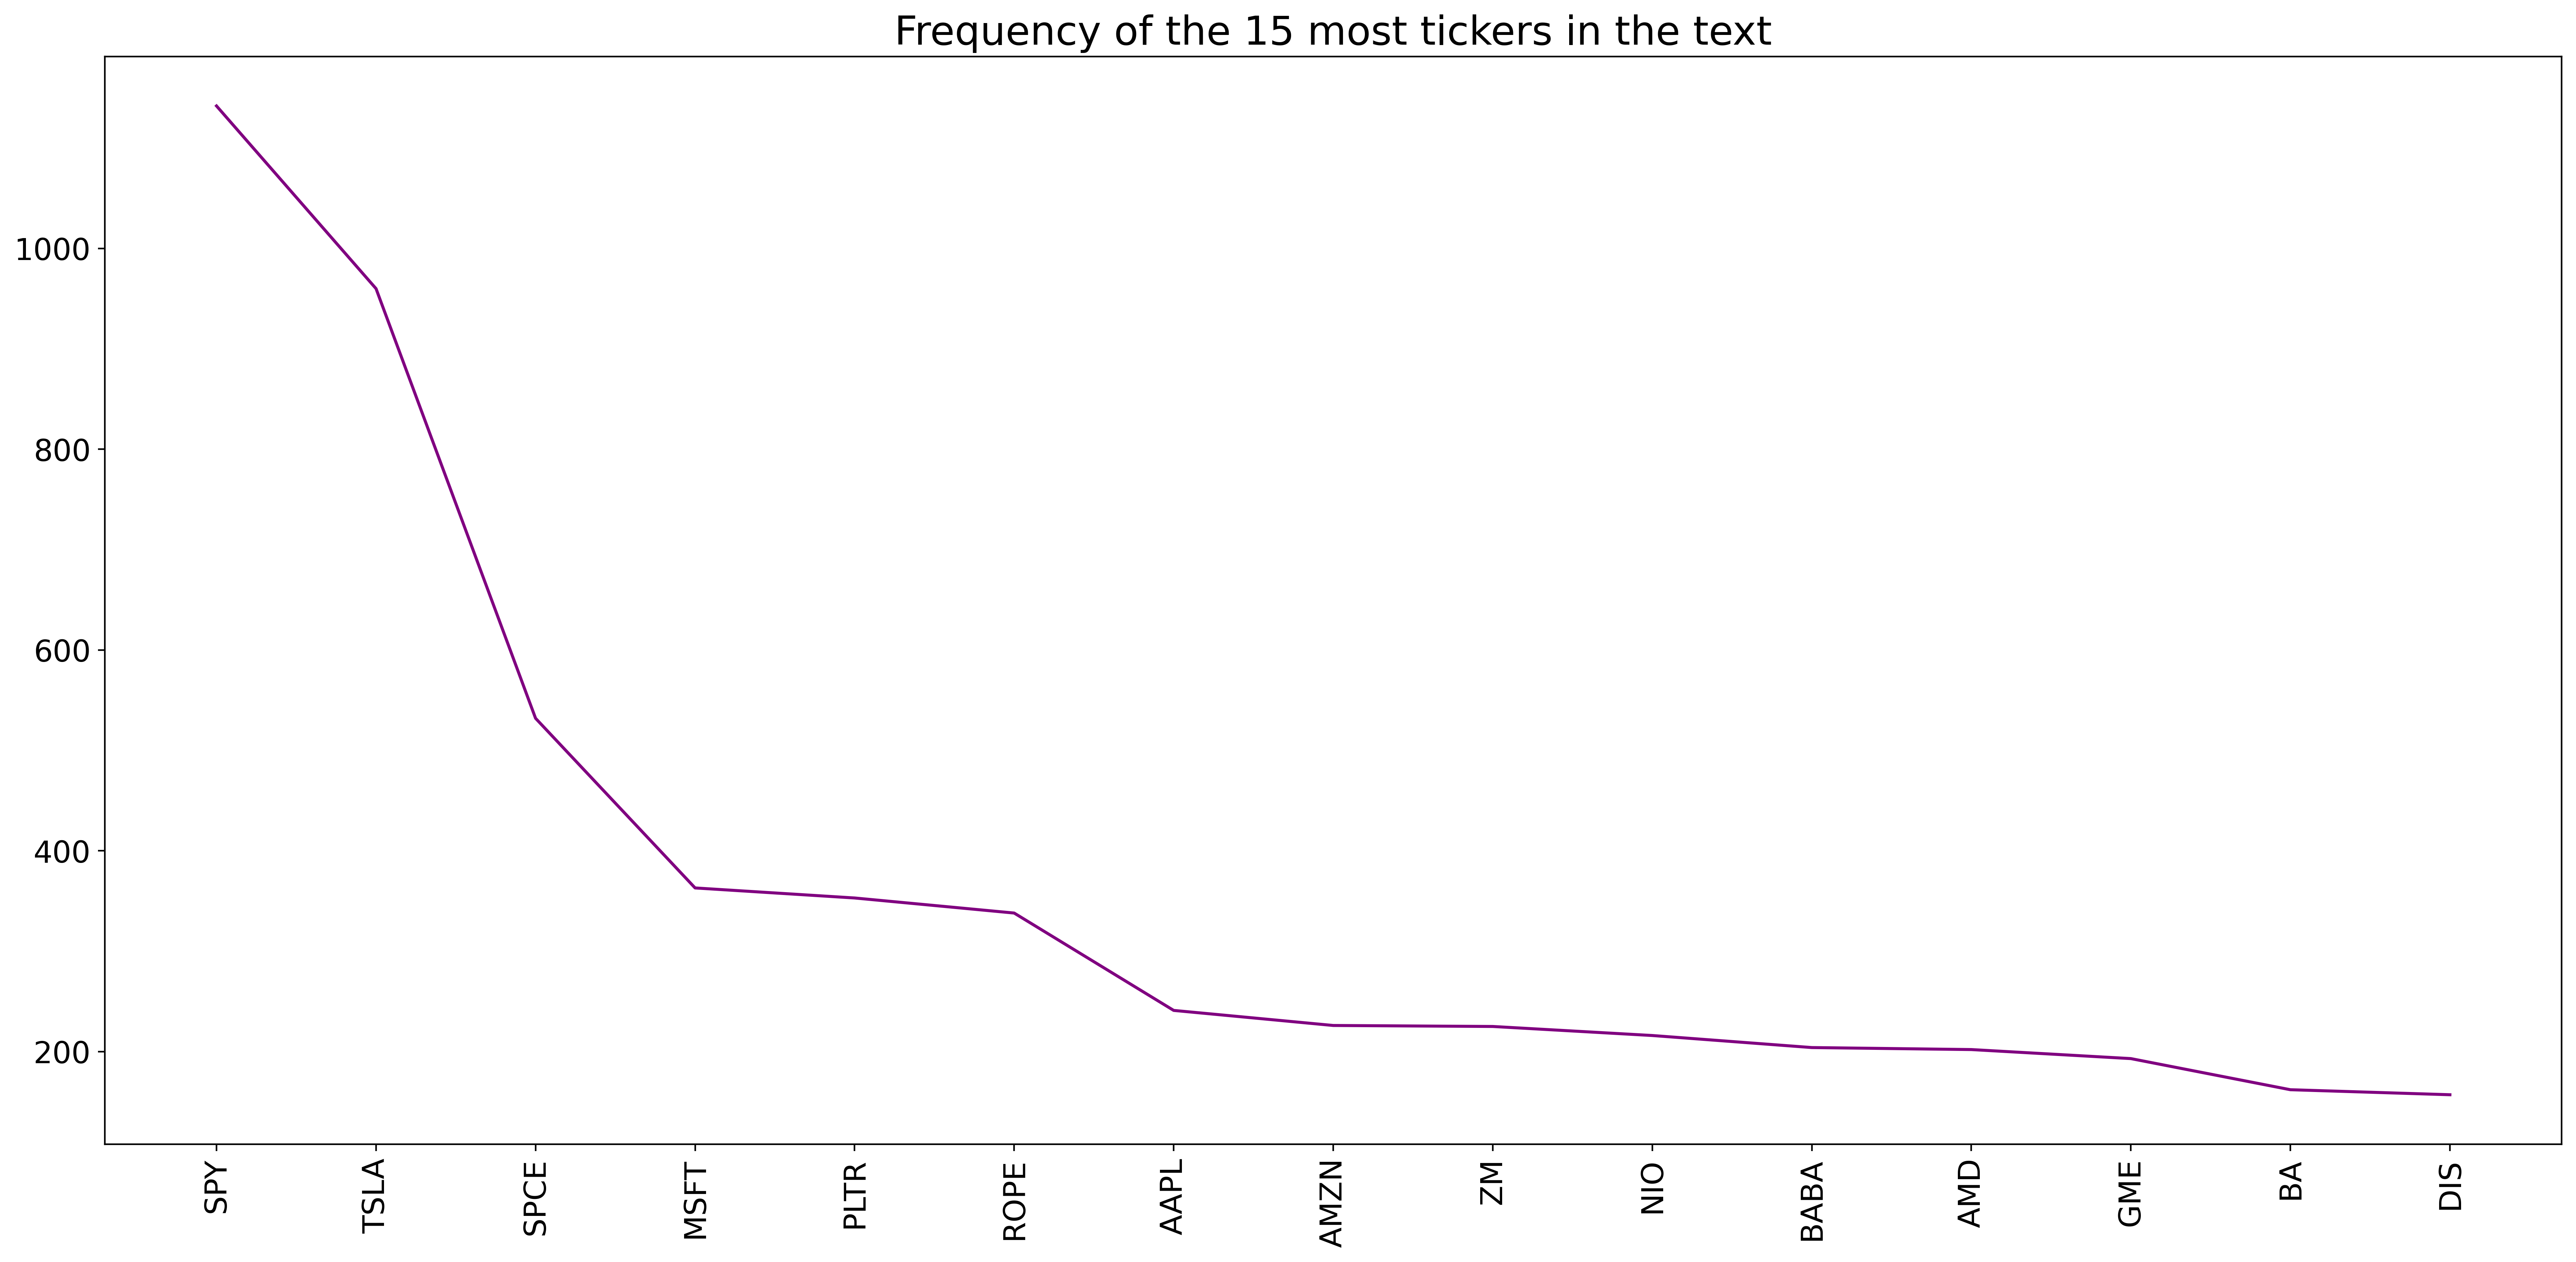

In [63]:
import nltk
from nltk import FreqDist


freq = FreqDist(tickers)
freq = list(freq.items())
freq.sort(reverse=True,key=lambda x: x[1])

import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(22,10),dpi=400)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
N = 15
ax.plot(*zip(*freq[:N]),'-',color='purple')
plt.title(label=f'Frequency of the {N} most tickers in the text', fontdict={'fontsize': 20});

In [75]:
" ".join([tick[0] for tick in freq[:N]])
# $ROPE is not a real ticker, but rather used to indicate that the user should hang themselves after
# losing a lot of money.
company_names = ['SPDR S&P 500 ETF Trust','Tesla', 'Virgin Galactic', 'Microsoft', 'Palantir Technologies',
                  'Rope', 'Apple', 'Amazon', 'Zoom Video Communications','Nio Inc', 'Alibaba Group',
                 'Advanced Micro Devices', 'Gamestop', 'Boeing', 'The Walt Disney Company']
                 

_Exercise 3: TF-IDF and the stocks discussed on r/wallstreetbets._ The goal for this exercise is to find the words charachterizing each of the stocks discussed on r/wallstreetbets. We will focus on the top 15 stocks we idenfied in Exercise 2, and we will of course use TF-IDF.

 
> 1. First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). Explain in your own words the point of TF-IDF. 
>   * What does TF stand for? 
>   * What does IDF stand for?
>

TF = Term Frequency = The frequency a 'term' occurs in a document

IDF = Inverse document frequency = $$\log(\frac{N}{|\{d \in D: t \in d\}}|)$$
D = Documents, N = |D|, t = term

> 2. Tokenize the __text__ of each submission. Create a column __tokens__ in your dataframe containing the tokens. Remember the bullets below for success.
>   * If you dont' know what _tokenization_ means, go back and read Chapter 3 again. **The advice to go back and check Chapter 3 is valid for every cleaning step below**.
>   * Exclude punctuation.
>   * Exclude URLs
>   * Exclude stop words (if you don't know what stop words are, go back and read NLPP1e again).
>   * Exclude numbers (since they're difficult to interpret in the word cloud).
>   * Set everything to lower case.
>   * **Note** that none of the above has to be perfect. And there's some room for improvisation. You can try using stemming. In my own first run the results didn't look so nice, because some submissions repeat certain words again and again and again, whereas other are very short. For that reason, I decided to use the unique set of words from each submission rather than each word in proportion to how it's actually used. Choices like that are up to you.

In [68]:
wsb['tokens'] = [word_tokenize(text) for text in wsb.text]

In [72]:
from nltk.corpus import stopwords

wsb['tokens'] = [[t.lower() for t in token if t.lower() not in stopwords.words('english')] for token in wsb.tokens]

In [87]:
import string
wsb['tokens'] = [[t for t in token if t not in string.punctuation] for token in wsb.tokens]

> 3. Find submissions discussing at least one of the top 15 stocks you identified above. To do so: 
> > * Create a function that finds the intersection between a list of tokens and your list of top 15 stocks. For example, your function applied to the tokens: _"[Here, TSLA, submission, GME]"_ should return ["TSLA","GME"]. (_Optional_: you can also try to included cases in which the list of tokens contains a company name among your top 15. For example the function applied to _"[Here, Gamestop, submission]"_ could return ['GME'].)
> > * Create a new column _stock_ in your DataFrame, containing the output of your function applied to the _text_ column. Values in this column should be lists. 
> > * Handle cases where one post discusses more than one stock by applying the function [__explode__](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html) to the _stock_ column. This will duplicate submissions associated to multiple stocks. After exploding, the values included in the _stock_ column should be strings. 
> > * Handle cases where none of the selected stocks is discussed by replacing Nan values, for example with "Other".

In [82]:

n_tickers = [tick[0].lower() for tick in freq[:N]]
dict_ticker = dict(zip(n_tickers,n_tickers))
dict_name = dict(zip([name.lower() for name in company_names],n_tickers))

            
                   
def intersection(tokens):
    I = []
    for token in tokens:
        tick = dict_ticker.get(token)
        name = dict_name.get(token)
        if tick is not None:
            I.append(tick.upper())
        elif name is not None:
            I.append(name.upper())
    return I

In [89]:
wsb['stock'] = [intersection(token) for token in wsb.tokens]

In [94]:
j = 0
for stock in wsb.stock:
    j+= len(stock) != 0
print(f"Percent stock mention over submission {j/len(wsb.stock) * 100:.2f}%")

Percent stock mention over submission 33.72%


> 4. Now, we want to find out which words are important for each *stock*, so we're going to create several ***large documents, one for each stock***. Each document includes all the tokens related to the same stock. We will also have a document including discussions that do not relate to the top 15 stocks.

> 5. Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within __5 stocks of your choice__. 
>   * Describe similarities and differences between the stocks.
>   * Why aren't the TFs not necessarily a good description of the stocks?
>   * Next, we calculate IDF for every word. 
>   * What base logarithm did you use? Is that important?

> 6. We're ready to calculate TF-IDF. Do that for the __5 stock of your choice__. 
>   * List the 10 top TF words for each stock.
>  * List the 10 top TF-IDF words for each stock.
>   * Are these 10 words more descriptive of the stock? If yes, what is it about IDF that makes the words more informative?

 _Exercise 4: The Wordcloud_. It's time to visualize our results!

> * Install the [`WordCloud`](https://pypi.org/project/wordcloud/) module. 
> * Now, create word-cloud for each stock. Feel free to make it as fancy or non-fancy as you like. 
> * Comment on the results. Are these words to be expected? Is there anything that is surprising? 